## Retail Project

In [1]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *


#Performance
%load_ext memory_profiler

# Extra
from os import path
from PIL import Image

# Model = np.array(Image.open("model.png"))
# Failed attempted at adding a form to wordcloud

In [3]:
# Read
os.chdir(r"C:\Users\Nicol\Google Drive\Learning\Jupyter\NLP\Retail Project")
os.listdir()

data = pd.ExcelFile("retail dataset.xlsx")
df = data.parse("Sheet1", header=1)
df = df.drop(["Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26"], axis = 1)
df = df.drop(["REVIEW_ID", "RATING_RANGE"], axis = 1)

df["LABEL"] = 0
df.loc[df.RATING >= 3,"LABEL"] = 1

## PreProcessing

In [5]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    return words

## Functions

In [6]:
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)
    
# https://www.kaggle.com/longdoan/word-cloud-with-python
# https://github.com/amueller/word_cloud/issues/134
# https://amueller.github.io/word_cloud/auto_examples/masked.html

def cloud(text):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    stopwords = set(STOPWORDS) # Redundant
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))

    print(wordcloud)
    
    # Output Visualization
    fig = plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #fig.savefig("wordcloud.png", dpi=900)

## Sentiment Analysis

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

D:\WindowsApps\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
# Pre-Processing
data = df[["TITLE","REVIEW_TEXT","CLASS_NAME","AGE","RATING", "LABEL"]]
SIA = SentimentIntensityAnalyzer()
data.REVIEW_TEXT= data.REVIEW_TEXT.astype(str)

D:\WindowsApps\Anaconda\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
# Applying Model, Variable Creation
data['polarity_score']=data.REVIEW_TEXT.apply(lambda x:SIA.polarity_scores(x)['compound'])
data['neutral_score']=data.REVIEW_TEXT.apply(lambda x:SIA.polarity_scores(x)['neu'])
data['negative_score']=data.REVIEW_TEXT.apply(lambda x:SIA.polarity_scores(x)['neg'])
data['positive_score']=data.REVIEW_TEXT.apply(lambda x:SIA.polarity_scores(x)['pos'])
data['sentiment']=''
data.loc[data.polarity_score>0,'sentiment']='POSITIVE'
data.loc[data.polarity_score==0,'sentiment']='NEUTRAL'
data.loc[data.polarity_score<0,'sentiment']='NEGATIVE'

D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

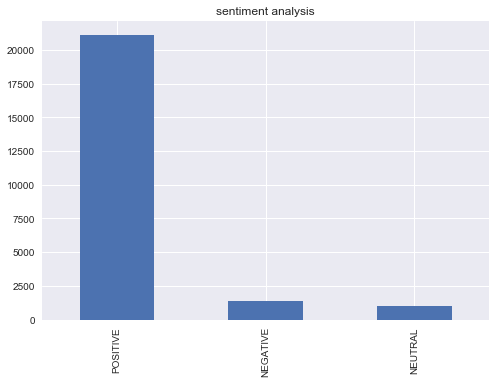

In [13]:
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")
plt.show()

## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B057005240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B0571918D0>]], dtype=object)

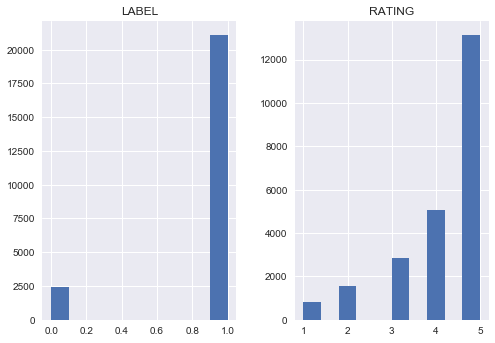

In [15]:
df[["LABEL","RATING"]].hist()

In [17]:
data.head()

TITLE                                                                      REVIEW_TEXT               CLASS_NAME  AGE  RATING  LABEL  polarity_score  neutral_score  \
0                      NaN                            absolutely wonderful - silky and sexy and comfortable  INTIMATES - ANTHRO (NA)   33       4      1          0.8932          0.272   
1                      NaN  Love this dress!  It's sooo pretty.  I happened to find it in a store, and I...   DRESSES - ANTHRO. (NA)   34       5      1          0.9729          0.664   
2  Some major design flaws  I had such high hopes for this dress and really wanted it to work for me. I ...   DRESSES - ANTHRO. (NA)   60       3      1          0.9520          0.784   
3         My Favorite Buy!  I love, love, love this jumpsuit. It's fun, flirty, and fabulous! Every time...     PANTS - PETITES (NA)   50       5      1          0.5727          0.340   
4         Flattering shirt  This shirt is very flattering to all due to the adjustable front tie. It is ...   BLOUSES - ANTHRO. (NA)   47       5      1          0.9291          0.700   

   negative_score  positive_score sentiment  
0           0.000           0.728  POSITIVE  
1           0.000           0.336  POSITIVE  
2           0.027           0.190  POSITIVE  
3           0.226           0.434  POSITIVE  
4           0.000           0.300  POSITIVE

In [18]:
data["AGECAT"] = pd.cut(np.array(data.AGE), 5, retbins=False)

D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


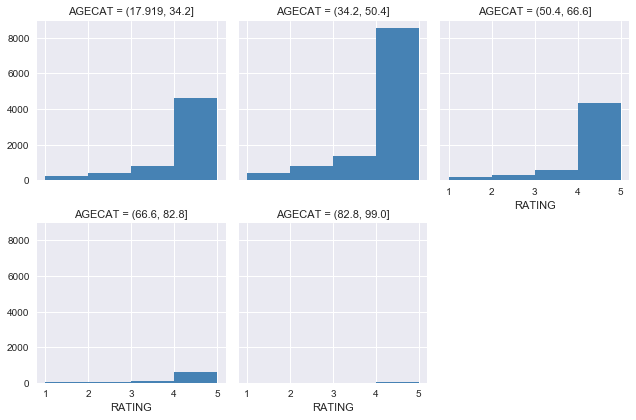

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(data, col="AGECAT",col_wrap=3, margin_titles=True)
bins = np.linspace(1, 5, 5)
g.map(plt.hist, "RATING", color="steelblue", bins=bins, lw=0)

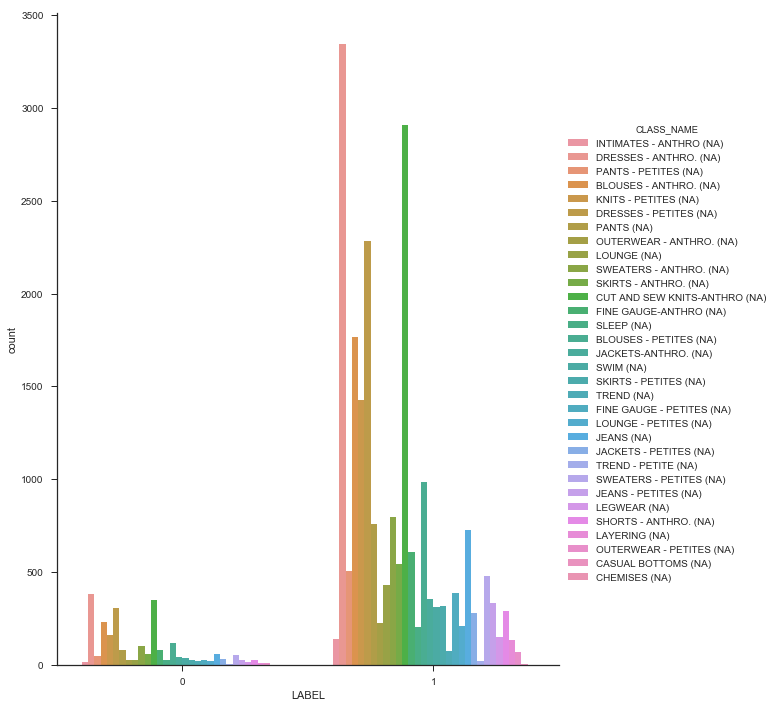

In [21]:
sns.set(style="ticks")
g = sns.factorplot("LABEL", hue="CLASS_NAME", data=data, kind="count", size=10, aspect=.8)

## Word Distribution and Word Cloud

         Frequency
Word              
dress        10969
love         10634
fit          10613
size          9809
look          7935
wear          7487
top           7468
color         6727
like          6711
great         5849
5             5097
order         4389
would         4366
small         4232
fabric        4167
perfect       3736
littl         3635
nice          3572
realli        3451
flatter       3437
None


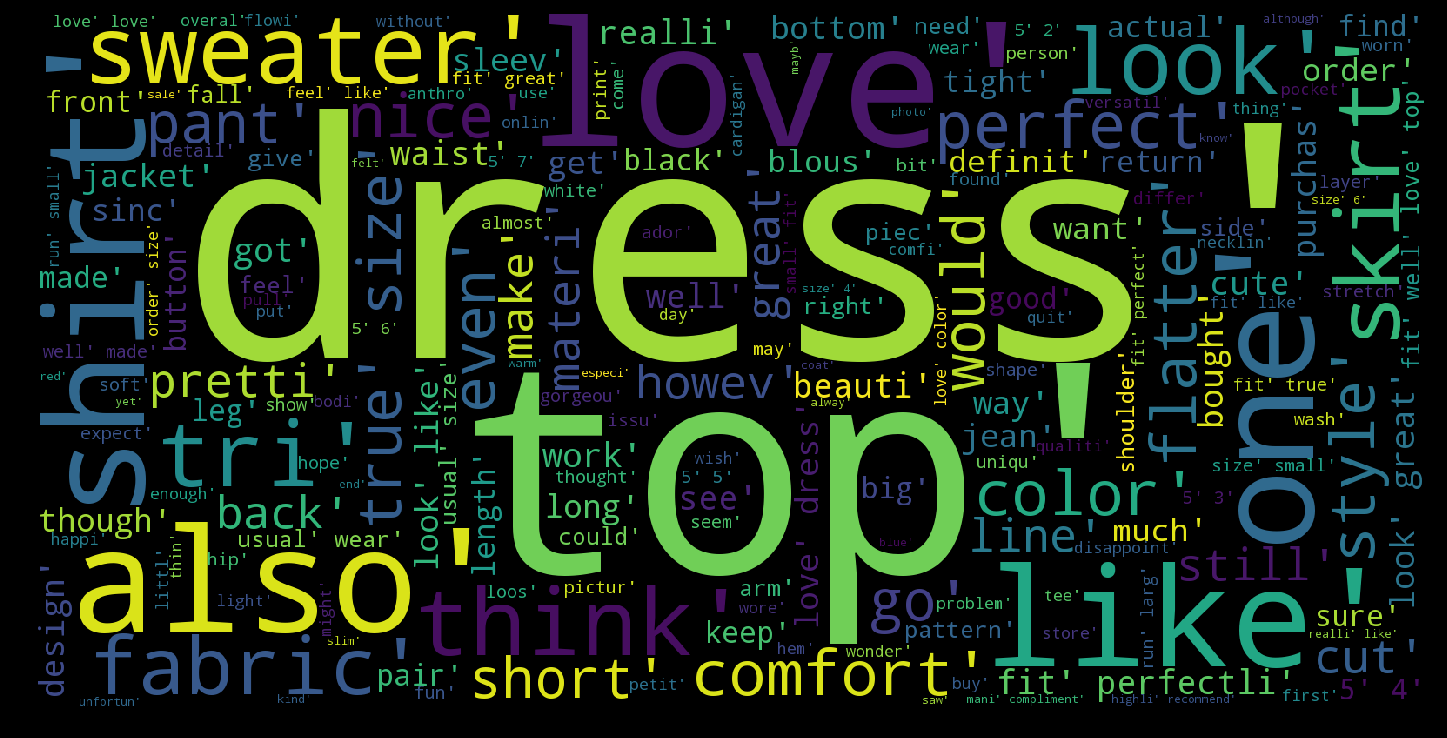

None


In [22]:
# Highly Raited
out = preprocessing(df[df.RATING >= 3]['REVIEW_TEXT'])
print(wordfreq(out,20))
print(cloud(out))
#print(wordfreqviz(out,10))

        Frequency
Word             
look         1419
dress        1218
like         1164
size          912
top           907
fit           899
love          761
would         743
fabric        726
order         625
back          615
wear          588
color         573
small         521
return        512
realli        474
shirt         468
5             453
tri           440
materi        438
None


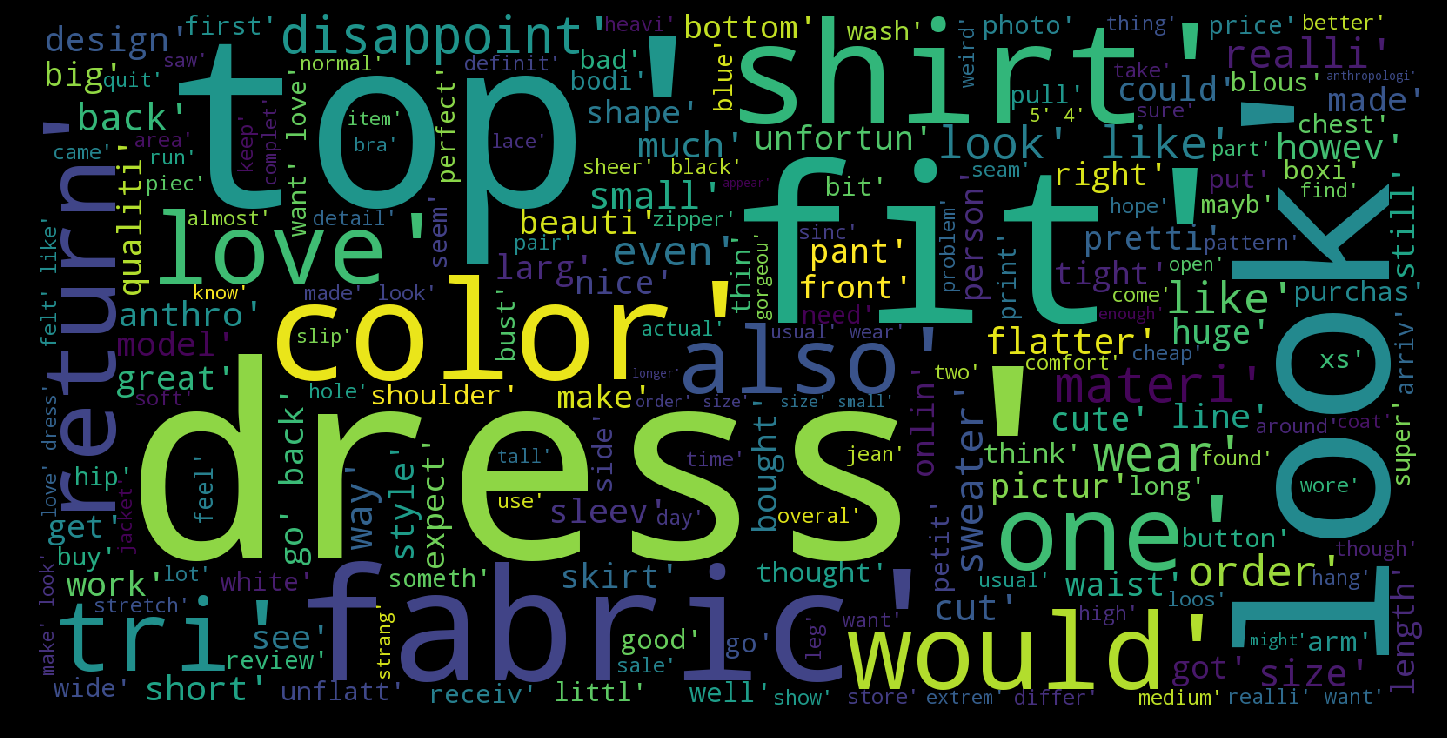

None


In [23]:
# Low Raited
out = preprocessing(df[df.RATING < 3]['REVIEW_TEXT'])
print(wordfreq(out,20))
print(cloud(out))
#print(wordfreqviz(out,10))

## N Grams

In [24]:
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    #----output----
    print(df.sort_values(["frequency"],ascending=[0])[:num])

In [25]:
print(gramfreq(preprocessing(df[df.RATING < 3]['REVIEW_TEXT']),2,15))
print(gramfreq(preprocessing(df[df.RATING < 3]['REVIEW_TEXT']),3,15))

             frequency
look like          330
go back            178
want love          126
realli want         86
made look           79
felt like           68
5 4                 66
usual wear          66
love dress          64
make look           61
size small          61
order size          60
much fabric         56
dress look          56
run small           55
None
                  frequency
realli want love         40
realli want like         29
want love dress          24
fit true size            22
look noth like           20
make look like           20
look like wear           20
sadli go back            19
look like matern         19
made look like           19
order usual size         17
usual wear size          16
way much fabric          16
like matern top          14
want love top            13
None


In [26]:
print(gramfreq(preprocessing(df[df.RATING >= 3]['REVIEW_TEXT']),2,15))
print(gramfreq(preprocessing(df[df.RATING >= 3]['REVIEW_TEXT']),3,15))

               frequency
true size           1299
fit perfectli       1064
look great           952
love dress           861
look like            824
5 4                  669
usual wear           630
love top             628
fit well             622
usual size           594
fit great            577
well made            570
5 3                  518
run larg             508
5 5                  492
None
                        frequency
fit true size                 478
run true size                 198
receiv mani compliment        172
love love love                142
small fit perfectli           141
fit like glove                135
usual wear size               117
order usual size              102
look great jean                89
run littl big                  89
look forward wear              88
run littl larg                 87
everi time wear                83
xs fit perfectli               79
medium fit perfectli           73
None


## Supervised Learning

In [27]:
data['tokenized'] = data.REVIEW_TEXT.astype(str).str.lower() # turn into lower case text
data['tokenized'] = data.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # apply tokenize to each row
data['tokenized'] = data['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # remove stopwords from each row
data['tokenized'] = data['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['REVIEW_TEXT'])) # calculate word occurence from whole block of text
word_features= list(all_words.keys())[:3000] # 5000 most recurring unique words

D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [28]:
len(all_words)

9810

In [29]:
labtext= list(zip(data.tokenized, (data.LABEL))) 
# Tuple each review with its label (1= greater/equal to 3, 0= under 3)

In [30]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [31]:
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

23486

In [33]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## Naive Bayes

In [34]:
%%time
%%memit
classifier = nltk.NaiveBayesClassifier.train(training_set) # Very scalable algorithm
# Posterior = prior_occurence * likelihood / evidence

peak memory: 3661.09 MiB, increment: 0.89 MiB
Wall time: 39.3 s


In [35]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

Classifier accuracy percent: 89.052557153
Most Informative Features
                   worst = True                0 : 1      =     34.5 : 1.0
                versatil = True                1 : 0      =     30.5 : 1.0
                      aw = True                0 : 1      =     24.1 : 1.0
                  unfold = True                0 : 1      =     20.6 : 1.0
                  pointi = True                0 : 1      =     20.6 : 1.0
                    tore = True                0 : 1      =     20.6 : 1.0
                 horrifi = True                0 : 1      =     20.6 : 1.0
                     rag = True                0 : 1      =     20.6 : 1.0
                  unwear = True                0 : 1      =     18.6 : 1.0
                  poorli = True                0 : 1      =     17.3 : 1.0
                   clown = True                0 : 1      =     16.4 : 1.0
                    mess = True                0 : 1      =     16.4 : 1.0
                 frankli = True 

## Word2Vec

In [36]:
#import gensim
from gensim.models import word2vec
import os
os.chdir(r"D:\My Computer\DATA\Retail")
os.listdir()

D:\WindowsApps\Anaconda\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['featuresets.pickle', 'GoogleNews-vectors-negative300.bin.gz']

In [37]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [38]:
data.head()

TITLE                                                                      REVIEW_TEXT               CLASS_NAME  AGE  RATING  LABEL  polarity_score  neutral_score  \
0                      NaN                            absolutely wonderful - silky and sexy and comfortable  INTIMATES - ANTHRO (NA)   33       4      1          0.8932          0.272   
1                      NaN  Love this dress!  It's sooo pretty.  I happened to find it in a store, and I...   DRESSES - ANTHRO. (NA)   34       5      1          0.9729          0.664   
2  Some major design flaws  I had such high hopes for this dress and really wanted it to work for me. I ...   DRESSES - ANTHRO. (NA)   60       3      1          0.9520          0.784   
3         My Favorite Buy!  I love, love, love this jumpsuit. It's fun, flirty, and fabulous! Every time...     PANTS - PETITES (NA)   50       5      1          0.5727          0.340   
4         Flattering shirt  This shirt is very flattering to all due to the adjustable front tie. It is ...   BLOUSES - ANTHRO. (NA)   47       5      1          0.9291          0.700   

   negative_score  positive_score sentiment          AGECAT                                                                        tokenized  
0           0.000           0.728  POSITIVE  (17.919, 34.2]                                          [absolut, wonder, silki, sexi, comfort]  
1           0.000           0.336  POSITIVE  (17.919, 34.2]  [love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, ord...  
2           0.027           0.190  POSITIVE    (50.4, 66.6]  [high, hope, dress, realli, want, work, initi, order, petit, small, usual, s...  
3           0.226           0.434  POSITIVE    (34.2, 50.4]  [love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, not...  
4           0.000           0.300  POSITIVE    (34.2, 50.4]  [shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeve...

In [39]:
w2vec = word2vec.Word2Vec(data["tokenized"], min_count=5, size=200)

In [40]:
w2vec.most_similar(["versatil"],topn=10)

[('casual', 0.8927257061004639),
 ('classi', 0.8787634372711182),
 ('fun', 0.8721978664398193),
 ('statement', 0.8669730424880981),
 ('everyday', 0.8608536720275879),
 ('dressi', 0.8553187847137451),
 ('varieti', 0.8315706253051758),
 ('chic', 0.8196890354156494),
 ('throw', 0.8182616233825684),
 ('fanci', 0.8181398510932922)]

In [41]:
w2vec.most_similar(["potato"],topn=10)

[('circu', 0.9271579384803772),
 ('muumuu', 0.8944361209869385),
 ('sack', 0.8786989450454712),
 ('boxier', 0.8752604722976685),
 ('giant', 0.8733600378036499),
 ('grandma', 0.8691012859344482),
 ('frankli', 0.8673849701881409),
 ('moo', 0.8625084161758423),
 ('shapeless', 0.8611592054367065),
 ('bathrob', 0.8556472063064575)]

In [42]:
w2vec.most_similar(["worst"],topn=10)

[('wonki', 0.9455311298370361),
 ('reduc', 0.9408819675445557),
 ('seriou', 0.9385228753089905),
 ('nightmar', 0.9371906518936157),
 ('mainli', 0.9338518381118774),
 ('broken', 0.9335381984710693),
 ('embarrass', 0.9330203533172607),
 ('couch', 0.9302147030830383),
 ('fault', 0.9290550947189331),
 ('bear', 0.9287937879562378)]

In [43]:
w2vec.most_similar(["rag"],topn=10)

[('bathrob', 0.9250954389572144),
 ('hospit', 0.8960498571395874),
 ('nightgown', 0.8949103355407715),
 ('frequent', 0.8848311305046082),
 ('sausag', 0.8840807676315308),
 ('becau', 0.8827689290046692),
 ('beyond', 0.8794338703155518),
 ('grate', 0.8784445524215698),
 ('moo', 0.8761259317398071),
 ('horrifi', 0.8676967024803162)]

In [44]:
w2vec.most_similar(["compliment"],topn=10)

[('complement', 0.8606182336807251),
 ('ton', 0.84146648645401),
 ('ts', 0.7672268748283386),
 ('numer', 0.7658584117889404),
 ('galor', 0.6716970205307007),
 ('stranger', 0.6498090028762817),
 ('mani', 0.6450095176696777),
 ('friend', 0.6331435441970825),
 ('load', 0.6319693326950073),
 ('countless', 0.6275275945663452)]

In [45]:
w2vec.most_similar(["love"],topn=10)

[('ador', 0.8421857357025146),
 ('amaz', 0.7161113619804382),
 ('gorgeou', 0.714821994304657),
 ('fabul', 0.6765481233596802),
 ('beauti', 0.6618409156799316),
 ('fantast', 0.6481332182884216),
 ('classic', 0.6348932981491089),
 ('wonder', 0.6278669238090515),
 ('fun', 0.6043121218681335),
 ('sweet', 0.6043031215667725)]

In [46]:
w2vec.most_similar(["shame"],topn=10)

[('mainli', 0.9254902601242065),
 ('reluctantli', 0.9153798818588257),
 ('crook', 0.8994790315628052),
 ('wonki', 0.8957245349884033),
 ('jut', 0.8951035737991333),
 ('clip', 0.8948020935058594),
 ('de', 0.8946875929832458),
 ('integr', 0.893021821975708),
 ('encourag', 0.8923550844192505),
 ('worst', 0.8911826014518738)]

In [47]:
w2vec.most_similar(["dear"],topn=10)

[('kangaroo', 0.9605868458747864),
 ('showcas', 0.9524108171463013),
 ('swimwear', 0.9524015784263611),
 ('preciou', 0.9507198333740234),
 ('stress', 0.9484901428222656),
 ('wont', 0.9483755230903625),
 ('ski', 0.9481326341629028),
 ('worthwhil', 0.9472863674163818),
 ('ranna', 0.946923553943634),
 ('glamor', 0.9468120336532593)]